In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

In [2]:
file_name = 'fit_data.xlsx'
df_u = pd.read_excel(file_name, sheet_name = 'U_AC_10%_LOESS')
df_d13c = pd.read_excel(file_name, sheet_name = 'C_AC_10%_LOESS')
df_pco2 = pd.read_excel(file_name, sheet_name = 'pCO2_LOESS')

df_pco2['age_new'] = -df_pco2['age']*1e6
df_d13c['age_new'] = -df_d13c['age']*1e6
df_u['age_new'] = -df_u['age']*1e6
df_u['d235u'] = df_u['mean']-0.27

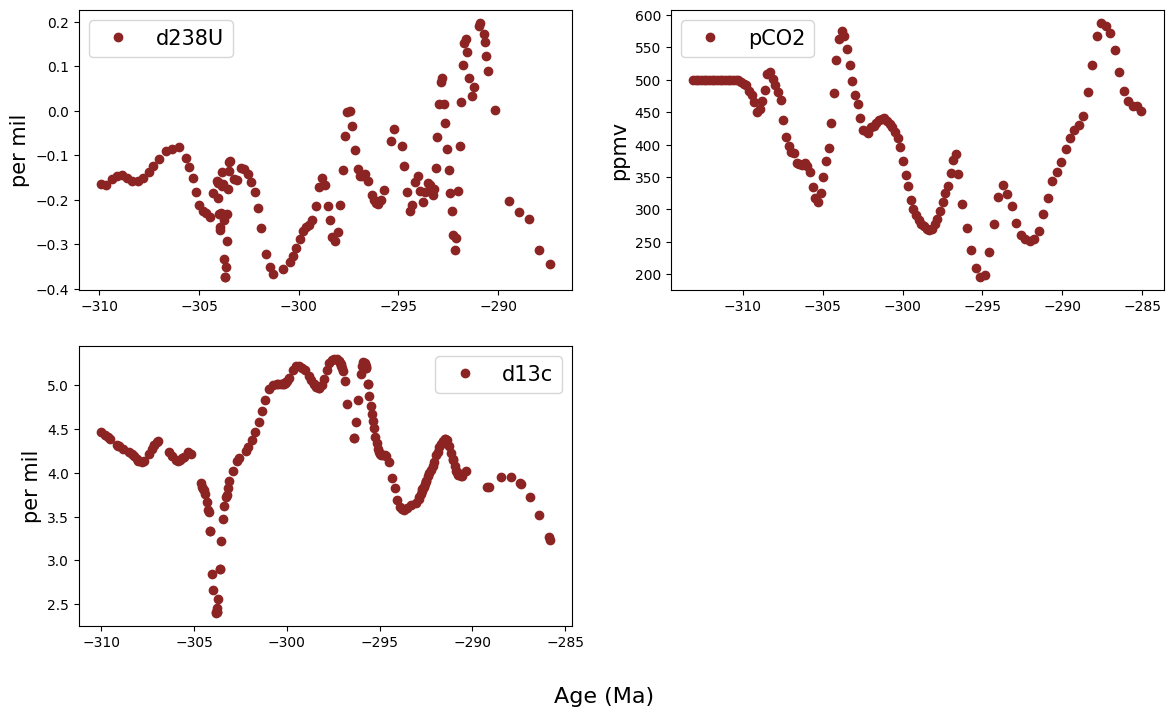

In [5]:
fig, axs = plt.subplots(2,2, figsize = (14,8))

axs[0,0].plot(-df_u.age, df_u['mean'], marker = 'o', c='#8d2424', ls = '', label = 'd238U')
axs[1,0].plot(-df_d13c.age, df_d13c['mean'], marker = 'o',c='#8d2424', ls='', label = 'd13c')
axs[0,1].plot(-df_pco2.iloc[:,0], df_pco2.iloc[:,1], marker = 'o', c='#8d2424', ls='', label = 'pCO2')
axs[1,1].remove()

fig.supxlabel('Age (Ma)', fontsize=16, color="black")
axs[0,0].set_ylabel('per mil', fontsize = 15)
axs[1,0].set_ylabel('per mil', fontsize = 15)
axs[0,1].set_ylabel('ppmv', fontsize = 15)

axs[0,0].tick_params(axis="both", labelsize=10)
axs[0,1].tick_params(axis="both", labelsize=10)
axs[1,0].tick_params(axis="both", labelsize=10)

axs[0,0].legend(fontsize = 15)
axs[1,0].legend(fontsize = 15)
axs[0,1].legend(fontsize = 15)


In [113]:

int1 = np.linspace(290e6, 292e6, 3, endpoint = True)
int2 = np.arange(292e6+2e5, 305.3e6, 2e5)
int3 = np.linspace(305.4e6, 310e6, 5, endpoint = True)

age = np.sort(np.hstack([int1,int2,int3]))[::-1]
age

array([3.1000e+08, 3.0885e+08, 3.0770e+08, 3.0655e+08, 3.0540e+08,
       3.0520e+08, 3.0500e+08, 3.0480e+08, 3.0460e+08, 3.0440e+08,
       3.0420e+08, 3.0400e+08, 3.0380e+08, 3.0360e+08, 3.0340e+08,
       3.0320e+08, 3.0300e+08, 3.0280e+08, 3.0260e+08, 3.0240e+08,
       3.0220e+08, 3.0200e+08, 3.0180e+08, 3.0160e+08, 3.0140e+08,
       3.0120e+08, 3.0100e+08, 3.0080e+08, 3.0060e+08, 3.0040e+08,
       3.0020e+08, 3.0000e+08, 2.9980e+08, 2.9960e+08, 2.9940e+08,
       2.9920e+08, 2.9900e+08, 2.9880e+08, 2.9860e+08, 2.9840e+08,
       2.9820e+08, 2.9800e+08, 2.9780e+08, 2.9760e+08, 2.9740e+08,
       2.9720e+08, 2.9700e+08, 2.9680e+08, 2.9660e+08, 2.9640e+08,
       2.9620e+08, 2.9600e+08, 2.9580e+08, 2.9560e+08, 2.9540e+08,
       2.9520e+08, 2.9500e+08, 2.9480e+08, 2.9460e+08, 2.9440e+08,
       2.9420e+08, 2.9400e+08, 2.9380e+08, 2.9360e+08, 2.9340e+08,
       2.9320e+08, 2.9300e+08, 2.9280e+08, 2.9260e+08, 2.9240e+08,
       2.9220e+08, 2.9200e+08, 2.9100e+08, 2.9000e+08])

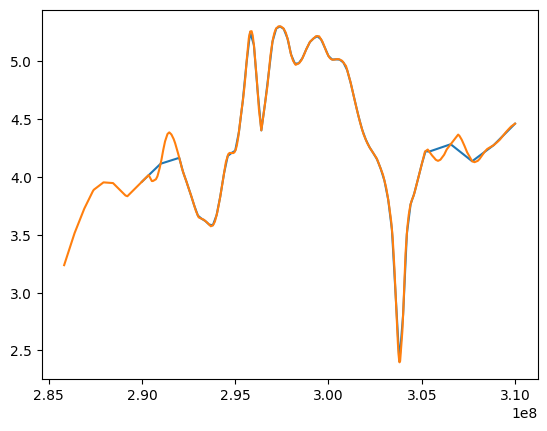

In [114]:



fd13c = interpolate.interp1d(df_d13c.age.values*1e6, df_d13c['mean'].values)
fd13c_std = interpolate.interp1d(df_d13c.age.values*1e6, df_d13c['mean'].values-df_d13c['mean-std'].values)
d13c_new = fd13c(age)
d13c_std = fd13c_std(age)
# plt.plot(age, d13c_std)
plt.plot(age, d13c_new)
plt.plot(df_d13c.age*1e6, df_d13c['mean'])

# d13c_target = pd.DataFrame(np.array([d13c_new, d13c_std]).T, index = -age)
# d13c_target.columns = ['d13c', 'std']
# d13c_target.index.name = 'age'
# d13c_target.to_csv('d13c_target.csv')

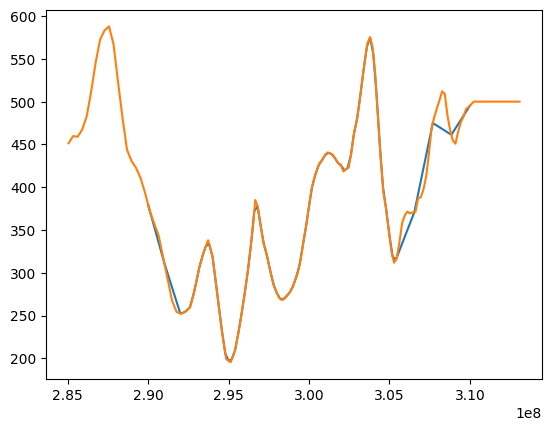

In [115]:

fpco2 = interpolate.interp1d(df_pco2.age.values*1e6, df_pco2['pco2'].values)
fpco2_std = interpolate.interp1d(df_pco2.age.values*1e6, df_pco2['(-) error'].values)
pco2_new = fpco2(age)
pco2_std = fpco2_std(age)
# plt.plot(age, pco2_std)
plt.plot(age, pco2_new)
plt.plot(df_pco2.age*1e6, df_pco2['pco2'])

pco2_target = pd.DataFrame(np.array([pco2_new, pco2_std]).T, index = -age)
pco2_target.columns = ['pco2', 'std']
pco2_target.index.name = 'age'
pco2_target.to_csv('pco2_target.csv')

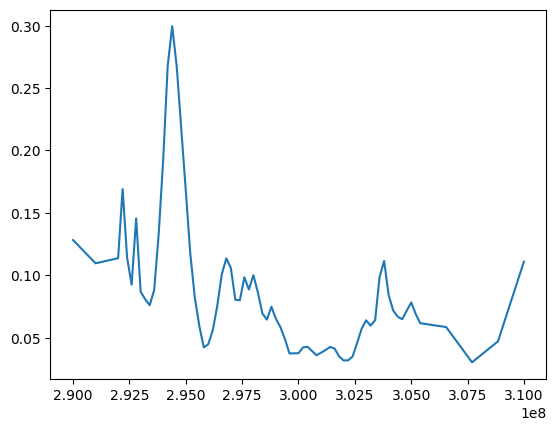

In [116]:
fu = interpolate.interp1d(df_u.age.values*1e6, df_u['mean'].values, bounds_error = False, fill_value = 'extrapolate')
fu_std = interpolate.interp1d(df_u.age.values*1e6, df_u['mean'].values-df_u['mean-std'].values, bounds_error = False, fill_value = 'extrapolate')
u_new = fu(age)-0.27
u_std = fu_std(age)
plt.plot(age, u_std)
# plt.plot(age, u_new)
# plt.plot(df_u.age*1e6, df_u['mean'])

u_target = pd.DataFrame(np.array([u_new, u_std]).T, index = -age)
u_target.columns = ['u', 'std']
u_target.index.name = 'age'
u_target.to_csv('u_target.csv')

In [117]:
target = pd.DataFrame(np.array([d13c_new, d13c_std, pco2_new, pco2_std, u_new, u_std]).T, index = -age)
target.columns = ['d13c', 'd13c_std', 'pco2', 'pco2_std', 'u', 'u_std']
target.index.name = 'age'
target.to_csv('target.csv')

In [118]:
target

,d13c,d13c_std,pco2,pco2_std,u,u_std
age,,,,,,
-310000000.0,4.457472,0.132731,495.068576,313.179543,-0.432960,0.110927
-308850000.0,4.271463,0.114719,461.232089,146.958625,-0.414646,0.047129
-307700000.0,4.133058,0.101222,475.030389,119.250394,-0.416530,0.030291
-306550000.0,4.279813,0.126801,370.797312,138.524232,-0.359399,0.058519
-305400000.0,4.216516,0.203244,315.166774,116.152836,-0.409400,0.061614
...,...,...,...,...,...,...
-292400000.0,3.950475,0.063016,255.847500,118.455000,-0.452480,0.113972
-292200000.0,4.043270,0.070257,253.340714,116.093571,-0.569436,0.169089
-292000000.0,4.162685,0.074984,252.356786,111.782857,-0.452219,0.113675


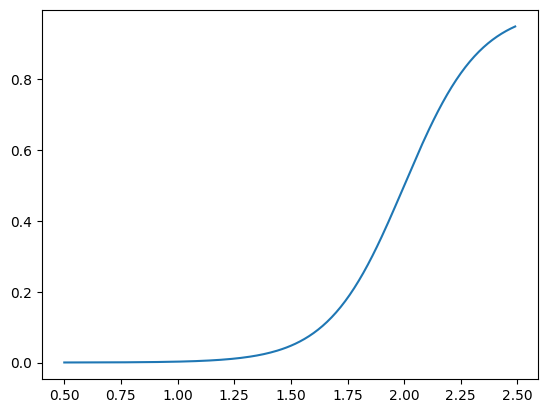

In [119]:
def anox(ratio):
    return 1/(1+np.exp(-12 * (0.5 * ratio-1)))

ratio = np.arange(0.5,2.5,0.01)
plt.plot(ratio, anox(ratio))